<a href="https://colab.research.google.com/github/Nithyaasri/DATA_SCIENCE_E-RECORD07/blob/main/11239M007_EXERCISE1_DSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()  # This will open a dialog to upload your file


Saving IPL.csv to IPL.csv


Teams sorted by number of cups:
  Teams jersey_colour  no.of cups  no.of orange caps
0   csk        yellow           5                  4
6    mi          blue           5                  0
4   kkr        violet           2                  2
9   srh        orange           1                  4
8    rr   pink & blue           1                  3
3    gt     navy blue           1                  1
1   rcb           red           0                  3
2    dc    blue & red           0                  0
5   lsg      darkblue           0                  0
7  pbks    red & blue           0                  1

Teams sorted by number of orange caps:
  Teams jersey_colour  no.of cups  no.of orange caps
0   csk        yellow           5                  4
9   srh        orange           1                  4
1   rcb           red           0                  3
8    rr   pink & blue           1                  3
4   kkr        violet           2                  2
3    gt     navy blue      

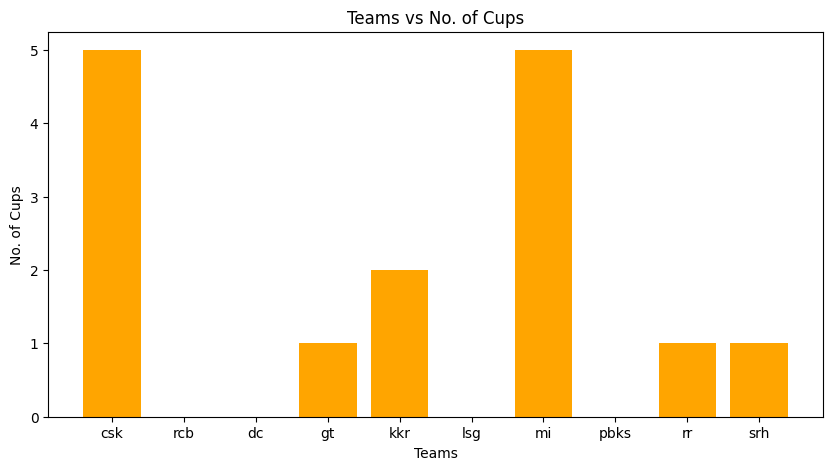

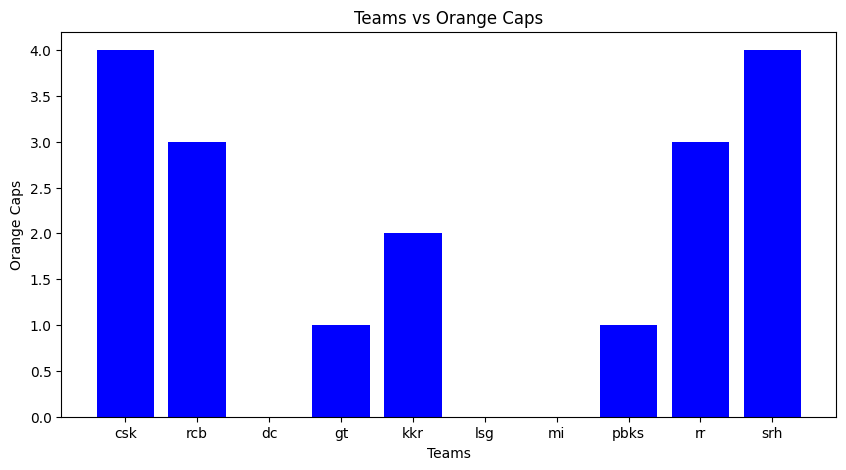

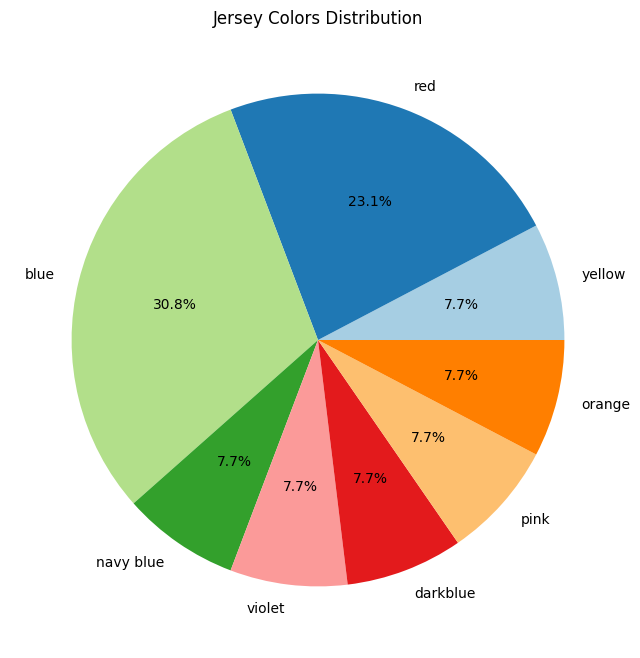

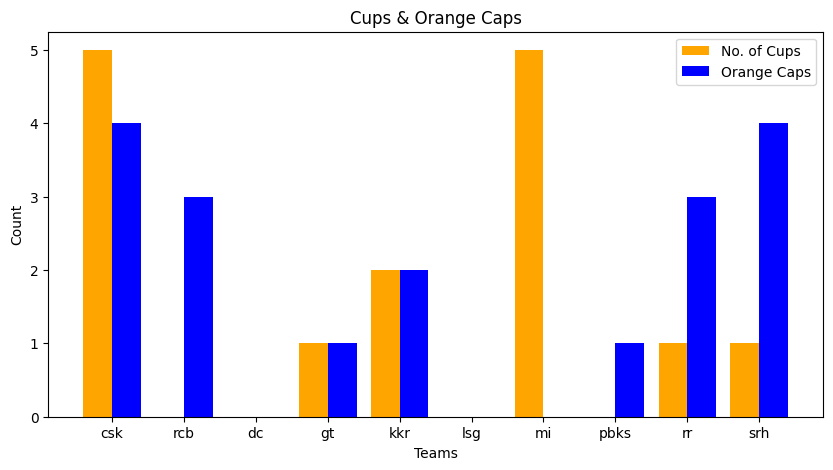


Teams with same number of cups and orange caps:
  Teams jersey_colour  no.of cups  no.of orange caps
2    dc    blue & red           0                  0
3    gt     navy blue           1                  1
4   kkr        violet           2                  2
5   lsg      darkblue           0                  0

Teams with zero cups and zero orange caps:
  Teams jersey_colour  no.of cups  no.of orange caps
2    dc    blue & red           0                  0
5   lsg      darkblue           0                  0

Underperforming teams:
  Teams jersey_colour  no.of cups  no.of orange caps
1   rcb           red           0                  3
2    dc    blue & red           0                  0
3    gt     navy blue           1                  1
5   lsg      darkblue           0                  0
7  pbks    red & blue           0                  1
8    rr   pink & blue           1                  3
9   srh        orange           1                  4

Overachieving teams:
  Teams jerse

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the IPL dataset
ipl_df = pd.read_csv("IPL.csv")

# 1. Rankings & Sorting
# Sort teams by number of cups
sorted_by_cups = ipl_df.sort_values(by="no.of cups", ascending=False)
print("Teams sorted by number of cups:")
print(sorted_by_cups)

# Sort teams by number of orange caps
sorted_by_orange_caps = ipl_df.sort_values(by="no.of orange caps", ascending=False)
print("\nTeams sorted by number of orange caps:")
print(sorted_by_orange_caps)

# 2. Statistical Analysis
# Average cups per team
average_cups = ipl_df["no.of cups"].mean()
print(f"\nAverage cups per team: {average_cups:.2f}")

# Median and mode of orange caps
median_orange_caps = ipl_df["no.of orange caps"].median()
mode_orange_caps = ipl_df["no.of orange caps"].mode()[0]
print(f"Median of orange caps: {median_orange_caps}")
print(f"Mode of orange caps: {mode_orange_caps}")

# Total cups won across all teams
total_cups = ipl_df["no.of cups"].sum()
print(f"Total cups won across all teams: {total_cups}")

# 3. Color-based Insights
# Most common jersey color
colors = ipl_df["jersey_colour"].str.split(" & ").explode()
most_common_color = Counter(colors).most_common(1)[0]
print(f"\nMost common jersey color: {most_common_color[0]} (Count: {most_common_color[1]})")

# Correlation between color and success
color_cups = ipl_df.groupby("jersey_colour")["no.of cups"].sum()
print("\nCorrelation between colors and success:")
print(color_cups)

# 4. Visualizations
# Bar chart: Teams vs No. of Cups
plt.figure(figsize=(10, 5))
plt.bar(ipl_df["Teams"], ipl_df["no.of cups"], color="orange")
plt.title("Teams vs No. of Cups")
plt.xlabel("Teams")
plt.ylabel("No. of Cups")
plt.show()

# Bar chart: Teams vs Orange Caps
plt.figure(figsize=(10, 5))
plt.bar(ipl_df["Teams"], ipl_df["no.of orange caps"], color="blue")
plt.title("Teams vs Orange Caps")
plt.xlabel("Teams")
plt.ylabel("Orange Caps")
plt.show()

# Pie chart of jersey colors
plt.figure(figsize=(8, 8))
colors_counts = Counter(colors)
plt.pie(colors_counts.values(), labels=colors_counts.keys(), autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Jersey Colors Distribution")
plt.show()

# Stacked bar: Cups & Orange Caps side-by-side
plt.figure(figsize=(10, 5))
width = 0.4
x = range(len(ipl_df))
plt.bar(x, ipl_df["no.of cups"], width=width, label="No. of Cups", color="orange")
plt.bar([i + width for i in x], ipl_df["no.of orange caps"], width=width, label="Orange Caps", color="blue")
plt.xticks([i + width / 2 for i in x], ipl_df["Teams"])
plt.title("Cups & Orange Caps")
plt.xlabel("Teams")
plt.ylabel("Count")
plt.legend()
plt.show()

# 5. Custom Insights
# Teams with same number of cups and orange caps
same_cups_caps = ipl_df[ipl_df["no.of cups"] == ipl_df["no.of orange caps"]]
print("\nTeams with same number of cups and orange caps:")
print(same_cups_caps)

# Teams with zero cups and zero orange caps
zero_cups_caps = ipl_df[(ipl_df["no.of cups"] == 0) & (ipl_df["no.of orange caps"] == 0)]
print("\nTeams with zero cups and zero orange caps:")
print(zero_cups_caps)

# Highlight underperforming vs overachieving teams
average_orange_caps = ipl_df["no.of orange caps"].mean()
underperforming = ipl_df[ipl_df["no.of cups"] < average_cups]
overachieving = ipl_df[ipl_df["no.of cups"] > average_cups]
print("\nUnderperforming teams:")
print(underperforming)
print("\nOverachieving teams:")
print(overachieving)

# 6. Text Analysis (Fun)
def create_tags(row):
    tags = []
    if row["no.of cups"] > 3:
        tags.append("Cup Kings")
    if row["no.of orange caps"] > 3:
        tags.append("Orange Hunters")
    if "blue" in row["jersey_colour"]:
        tags.append("Color Warriors")
    return ", ".join(tags)

ipl_df["Tags"] = ipl_df.apply(create_tags, axis=1)
print("\nFun Tags for Teams:")
print(ipl_df[["Teams", "Tags"]])
